follows [this blog post](http://neuralnetworksanddeeplearning.com/chap6.html)

In [1]:
using PyPlot

INFO: Loading help data...


In [2]:
data_directory = "neural-networks-and-deep-learning/data/"

"neural-networks-and-deep-learning/data/"

In [3]:
training_data = readcsv(join([data_directory, "training.csv"]))';

In [4]:
training_answers = readcsv(join([data_directory, "training_answers.csv"]))[:];

In [5]:
validation_data = readcsv(join([data_directory, "validation.csv"]))';

In [6]:
validation_answers = readcsv(join([data_directory, "validation_answers.csv"]));

Label: 4

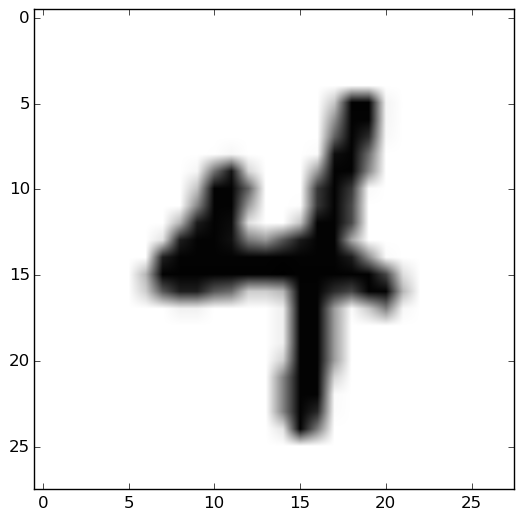

In [8]:
i = rand(1:50000)
imshow(reshape(training_data[:,i],(28,28))',cmap="Greys")
@printf("Label: %i", training_answers[i])

In [9]:
function feedforward(weights, biases, activations, f)
    for i = 1:length(weights)
        activations = f(weights[i] * activations + biases[i])
    end
    return activations ./ sum(activations)
end

feedforward (generic function with 1 method)

In [10]:
function sigmoid(x)
    return 1.0 ./ (1.0 + exp(-x))
end

sigmoid (generic function with 1 method)

In [11]:
function d_sigmoid(x)
    a = exp(-x)
    return a ./ ( 1 + a).^2
end

d_sigmoid (generic function with 1 method)

In [32]:
weights = {randn(30,784),randn(10,30)}
biases = {randn(30), randn(10)}

2-element Array{Any,1}:
 [-0.525469,0.755967,1.03448,-1.92686,-1.15352,-0.808704,-1.17499,-1.58834,-0.963183,0.287464  …  0.312202,1.30597,1.3755,2.07175,-2.46485,0.48906,0.894619,1.63584,-0.350745,0.614281]
 [0.999647,-1.31928,0.00824044,2.94128,-1.97562,0.836745,0.559236,-0.856049,1.71966,0.879644]                                                                                          

In [36]:
function backprop(weights, biases, input, answer, f, df, s, l)
    n = length(weights)
    
    function propagator(input, i)
        if i == n+1
            return -(answer./input + (answer - 1.0) ./ (1.0 - input))
        else
            weighted_sum = weights[i] * input + biases[i]
            layer_output = f(weighted_sum)
            d_layer_output = df(weighted_sum)
        
            backpropagator = propagator(layer_output, i+1) .* d_layer_output
            biases[i] -= s * backpropagator
            weights[i] = (1.0 - l * s)*weights[i] - s * backpropagator * input'
            return weights[i]' * backpropagator
        end
    end
    propagator(input, 1)
end
function backprop(weights, biases, input, answer, f, df, s)
    n = length(weights)
    
    function propagator(input, i)
        if i == n+1
            return -(answer./input + (answer - 1.0) ./ (1.0 - input))
        else
            weighted_sum = weights[i] * input + biases[i]
            layer_output = f(weighted_sum)
            d_layer_output = df(weighted_sum)
        
            backpropagator = propagator(layer_output, i+1) .* d_layer_output
            biases[i] -= s * backpropagator
            weights[i] -= s * backpropagator * input'
            return weights[i]' * backpropagator
        end
    end
    propagator(input, 1)
end

backprop (generic function with 2 methods)

In [14]:
targets = Array(Any,10)
for i = 1:10
    a = zeros(10)
    a[i] = 1.0
    targets[i] = a
end

In [15]:
training_inted = convert(Array{Int32,1}, training_answers);

In [37]:
for i = 1:50000
    backprop(weights, biases, training_data[:,i], targets[training_inted[i]+1], sigmoid, d_sigmoid, 0.5);
end

Image number: 7979
Image Label: 0
Network Guess: 9

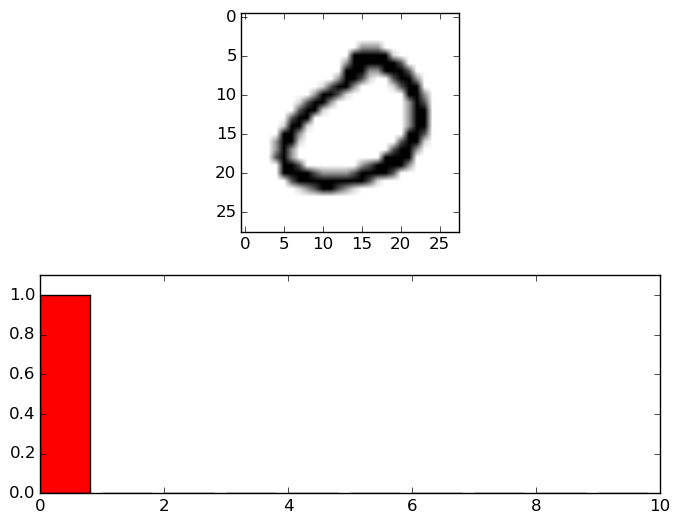

In [30]:
i = rand(1:50000)
network_guess = indmax(feedforward(weights,biases, training_data[:,i], sigmoid))-1
@printf("Image number: %d\nImage Label: %d\nNetwork Guess: %d", i, training_answers[i], network_guess)
subplot(211)
imshow(reshape(training_data[:,i],(28,28))',cmap="Greys")
subplot(212)
axis([0.0,10.0,0.0,1.1])
bar([0:9],[ (training_answers[i] == j ? 1.0 : 0.0) for j in 0:9 ], color="red")
bar([0:9],feedforward(weights,biases, training_data[:,i], sigmoid));

In [38]:
n = length(validation_answers)
accuracy = 0
for i = 1:n
    if indmax(feedforward(weights, biases, validation_data[:,i], sigmoid))-1 == validation_answers[i]
        accuracy += 1
    end
end
@printf("Network Accuracy: %f", accuracy/n)

Network Accuracy: 0.096100

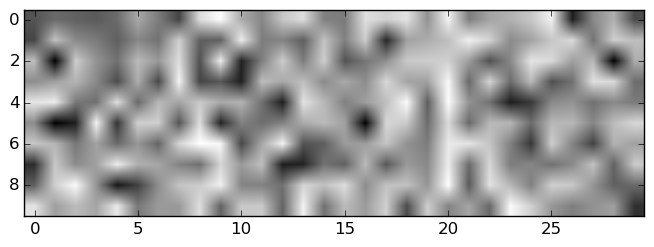

PyObject <matplotlib.image.AxesImage object at 0xa517f72c>

In [54]:
imshow(weights[2], cmap="Greys")

In [100]:
function sample( thing )
    i = 1
    x = rand()
    for j = 1:10
        x -= thing[i]
        if x < 0
            return j
            break
        end
    end
end

sample (generic function with 1 method)

In [101]:
feedforward(weights, biases, validation_data[:,1], sigmoid)

10-element Array{Float64,1}:
 1.08264e-5
 0.00013667
 0.00836052
 0.98065   
 5.1646e-7 
 0.00037059
 9.58759e-6
 9.73827e-7
 0.0104605 
 8.94349e-8

In [182]:
sample( feedforward(weights, biases, training_data[:,15143], sigmoid) )-1

0

In [173]:
function sample( w )
    x = rand() * sum( w )
    y = 0
    for i = 1:length(w)
        y = y + w[i]
        if x < y
            return i
        end
    end
end

sample (generic function with 1 method)